# Meta Llama 3.3 70B Instruct with v2.26 prompt

This notebook outlines the steps undertook to generate a prediction using Meta Llama 3.3 70B Instruct with prompt from 2/26/25.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from new_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import llama_instructions_v226
MODEL_ID = "us.meta.llama3-3-70b-instruct-v1:0"
SYSTEM_PROMPT = llama_instructions_v226

# Load the data

In [2]:
df = pd.read_csv("data/dataset_v1.csv")
len(df)

1084

In [3]:
df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,opinion_types,opinion_sources,cite_names,filename
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,['010combined'],['html_with_citations'],"['7 Wall. 700', 'White', 'Texas']",0001.91306_cites_88061.txt
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,['010combined'],['html_with_citations'],['21 Wall. 138'],0002.91306_cites_88994.txt
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,['010combined'],['html_with_citations'],['2 Wall. 110'],0003.91306_cites_87633.txt
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,['010combined'],['html_with_citations'],"['Texas', 'Hardenberg', '10 Wall. 68']",0004.91306_cites_88240.txt
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,['010combined'],['html_with_citations'],"['Texas', '16 Wall. 402']",0005.91306_cites_88693.txt


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 4
INFO:root:Completed: 1
INFO:root:Completed: 2
INFO:root:Completed: 3
INFO:root:Completed: 0
INFO:root:Completed: 7
INFO:root:Completed: 5
INFO:root:Completed: 6
INFO:root:Completed: 9
INFO:root:Completed: 8
INFO:root:Completed: 10
INFO:root:Completed: 12
INFO:root:Completed: 11
INFO:root:Completed: 13
INFO:root:Completed: 14
INFO:root:Completed: 16
INFO:root:Completed: 15
INFO:root:Completed: 18
INFO:root:Completed: 17
INFO:root:Completed: 21
INFO:root:Completed: 19
INFO:root:Completed: 20
INFO:root:Completed: 23
INFO:root:Completed: 22
INFO:root:Completed: 24
INFO:root:Completed: 26
INFO:root:Completed: 25
INFO:root:Completed: 27
INFO:root:Completed: 28
INFO:root:Completed: 29


CPU times: user 1min 5s, sys: 4.02 s, total: 1min 9s
Wall time: 9min 43s


[{'0005.91306_cites_88693.txt': {'model': 'us.meta.llama3-3-70b-instruct-v1:0',
   'input_tokens': 4607,
   'output_tokens': 115,
   'prediction': 'no',
   'confidence': 0.92,
   'rationale': 'The Acting Case discusses the Target Case as part of its reasoning but does not explicitly overrule it. Instead, it references and builds upon the decisions made in the Target Case and other related cases, without taking any Explicit or Implicit Negative Actions against the Target Case itself.',
   'instructions': 'Determine whether the Acting Case overruled the Target Case.',
   'target_case': 'Huntington v. Texas',
   'raw_results': '```json\n{\n  "instructions": "Determine whether the Acting Case overruled the Target Case.",\n  "target_case": "Huntington v. Texas",\n  "overruled": "no",\n  "confidence": 0.92,\n  "rationale": "The Acting Case discusses the Target Case as part of its reasoning but does not explicitly overrule it. Instead, it references and builds upon the decisions made in the T

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,0005.91306_cites_88693.txt,us.meta.llama3-3-70b-instruct-v1:0,4607,115,no,0.92,The Acting Case discusses the Target Case as p...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."
1,0002.91306_cites_88994.txt,us.meta.llama3-3-70b-instruct-v1:0,4073,148,no,0.92,"The Acting Case discusses the Target Case, Ver...",Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"```json\n{\n ""instructions"": ""Determine wheth..."
2,0003.91306_cites_87633.txt,us.meta.llama3-3-70b-instruct-v1:0,3150,138,no,0.92,The Acting Case references and discusses the T...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
3,0004.91306_cites_88240.txt,us.meta.llama3-3-70b-instruct-v1:0,4694,143,no,0.85,The Acting Case does not explicitly state that...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."
4,0001.91306_cites_88061.txt,us.meta.llama3-3-70b-instruct-v1:0,5544,121,yes,0.92,"The Acting Case, Morgan v. United States, expl...",Determine whether the Acting Case overruled th...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/2.llama/2.llama33_70B_v226_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

4

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/2.llama/2.llama33_70B_v226_prompt.csv")

In [9]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [10]:
assert len(df) == len(prediction_df)

In [11]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,us.meta.llama3-3-70b-instruct-v1:0,5544,121,yes,0.92,"The Acting Case, Morgan v. United States, expl...",Determine whether the Acting Case overruled th...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,us.meta.llama3-3-70b-instruct-v1:0,4073,148,no,0.92,"The Acting Case discusses the Target Case, Ver...",Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"```json\n{\n ""instructions"": ""Determine wheth..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,us.meta.llama3-3-70b-instruct-v1:0,3150,138,no,0.92,The Acting Case references and discusses the T...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,us.meta.llama3-3-70b-instruct-v1:0,4694,143,no,0.85,The Acting Case does not explicitly state that...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,us.meta.llama3-3-70b-instruct-v1:0,4607,115,no,0.92,The Acting Case discusses the Target Case as p...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."


# Run evaluation

In [12]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [14]:
eval_df["prediction"].value_counts()

prediction
no     879
yes    205
Name: count, dtype: int64

In [15]:
eval_df["input_tokens"].sum()

5798318

In [16]:
eval_df["output_tokens"].sum()

160331

In [17]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [18]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.98      0.92      0.95       935
         Yes       0.64      0.88      0.74       149

    accuracy                           0.92      1084
   macro avg       0.81      0.90      0.84      1084
weighted avg       0.93      0.92      0.92      1084



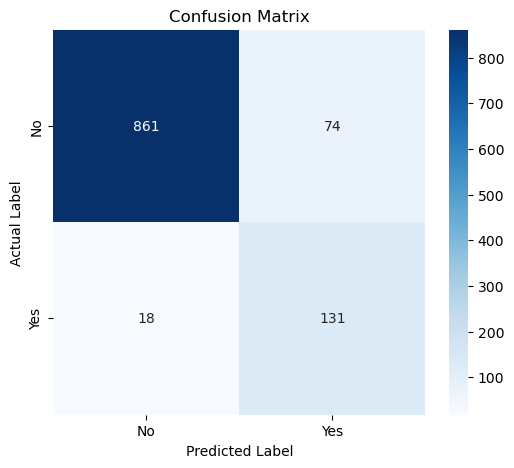

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.92
Precision: 0.64
Recall: 0.88
F-score: 0.74
Specificity: 0.92
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 131
True negatives: 861
False positives: 74
False negatives: 18


In [21]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

74

In [22]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

18

# Save the evaluation df

In [23]:
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,us.meta.llama3-3-70b-instruct-v1:0,5544,121,yes,0.92,"The Acting Case, Morgan v. United States, expl...",Determine whether the Acting Case overruled th...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,us.meta.llama3-3-70b-instruct-v1:0,4073,148,no,0.92,"The Acting Case discusses the Target Case, Ver...",Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"```json\n{\n ""instructions"": ""Determine wheth..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,us.meta.llama3-3-70b-instruct-v1:0,3150,138,no,0.92,The Acting Case references and discusses the T...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,us.meta.llama3-3-70b-instruct-v1:0,4694,143,no,0.85,The Acting Case does not explicitly state that...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,us.meta.llama3-3-70b-instruct-v1:0,4607,115,no,0.92,The Acting Case discusses the Target Case as p...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."


In [24]:
eval_df.to_csv("predictions/2.llama/2.llama33_70B_v226_prompt_eval.csv", index=False)